In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

import warnings
warnings.filterwarnings('ignore')

from torchsummary import summary
from train_models import ClassifierTrainer, RegressorTrainer

In [2]:
train_transformer = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
val_transformer = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [3]:
train_dataset = datasets.ImageFolder(
    'data/Module_3_Lecture_2_hymenoptera_data/train',
    transform=train_transformer
)

val_dataset = datasets.ImageFolder(
    'data/Module_3_Lecture_2_hymenoptera_data/val',
    transform=val_transformer
)

In [4]:
train_loader = DataLoader(
    train_dataset,
    batch_size=32,  
    shuffle=True,   
    num_workers=0   
)
val_loader = DataLoader(
    val_dataset,
    batch_size=32, 
    shuffle=False, 
    num_workers=0
)

In [5]:
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
print("Використовується пристрій:", device)

Використовується пристрій: mps


In [6]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.Adam(model_ft.parameters(), lr=1e-05)

In [7]:
trainer = ClassifierTrainer(model=model_ft,
                            criterion=criterion,
                            optimizer=optimizer_ft,
                            num_classes=2,
                            device='mps')

trainer.fit(train_loader,
            val_loader,
            num_epoch=10,
            info_every_iter=True,
            show_val_metrics=False)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10] Train Loss: 52.6137 Acc: 0.5369 Rec: 0.1405 Prec: 0.6538
Epoch [2/10] Train Loss: 50.5859 Acc: 0.6311 Rec: 0.2727 Prec: 0.9429
Epoch [3/10] Train Loss: 49.4799 Acc: 0.7090 Rec: 0.4132 Prec: 1.0000
Epoch [4/10] Train Loss: 48.6864 Acc: 0.7500 Rec: 0.5289 Prec: 0.9412
Epoch [5/10] Train Loss: 47.4872 Acc: 0.8115 Rec: 0.6364 Prec: 0.9747
Epoch [6/10] Train Loss: 46.7956 Acc: 0.8648 Rec: 0.7521 Prec: 0.9681
Epoch [7/10] Train Loss: 47.0623 Acc: 0.8852 Rec: 0.7686 Prec: 1.0000
Epoch [8/10] Train Loss: 46.1997 Acc: 0.8811 Rec: 0.7769 Prec: 0.9792
Epoch [9/10] Train Loss: 46.0546 Acc: 0.8934 Rec: 0.7934 Prec: 0.9897
Epoch [10/10] Train Loss: 46.4379 Acc: 0.9262 Rec: 0.8678 Prec: 0.9813


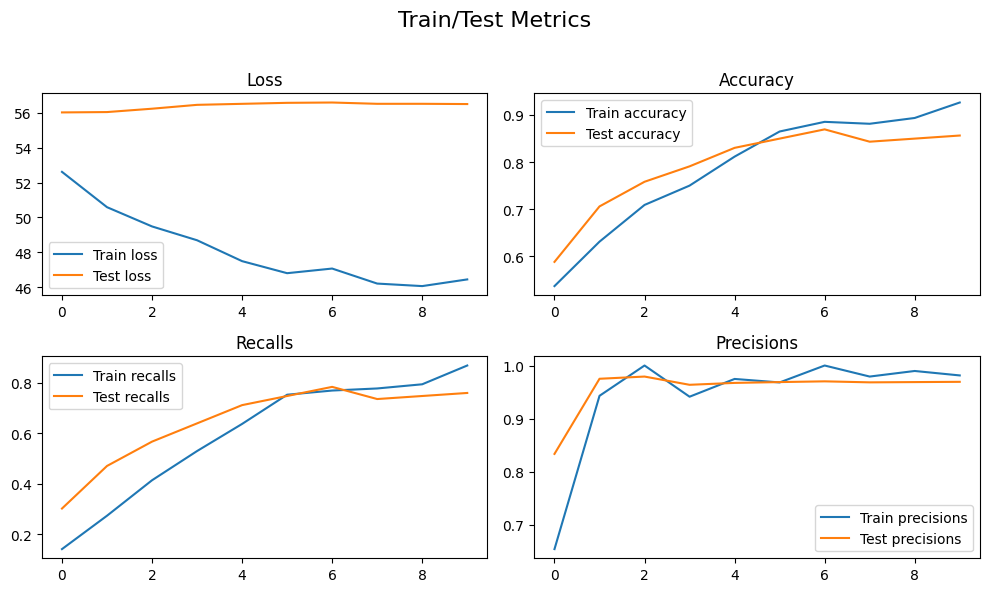

In [8]:
trainer.plot_metrics()

In [9]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
params = list(model_conv.parameters())
for param in params[:-10]:
    param.requires_grad = False

num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.Adam(model_conv.fc.parameters(), lr=1e-03)

In [10]:
summary(model_conv, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [11]:
model_conv

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
trainer = ClassifierTrainer(model=model_conv,
                            criterion=criterion,
                            optimizer=optimizer_conv,
                            num_classes=2,
                            device='cpu')

trainer.fit(train_loader,
            val_loader,
            num_epoch=10,
            info_every_iter=True,
            show_val_metrics=False)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10] Train Loss: 53.6583 Acc: 0.5328 Rec: 0.5702 Prec: 0.5267
Epoch [2/10] Train Loss: 50.0726 Acc: 0.6598 Rec: 0.9174 Prec: 0.6033
Epoch [3/10] Train Loss: 48.4137 Acc: 0.7500 Rec: 0.9835 Prec: 0.6685
Epoch [4/10] Train Loss: 48.5751 Acc: 0.7869 Rec: 0.9421 Prec: 0.7170
Epoch [5/10] Train Loss: 47.8209 Acc: 0.8811 Rec: 0.9752 Prec: 0.8194
Epoch [6/10] Train Loss: 47.7982 Acc: 0.8770 Rec: 0.9174 Prec: 0.8473
Epoch [7/10] Train Loss: 47.1339 Acc: 0.8893 Rec: 0.8017 Prec: 0.9700
Epoch [8/10] Train Loss: 47.2510 Acc: 0.8361 Rec: 0.6777 Prec: 0.9880
Epoch [9/10] Train Loss: 47.3204 Acc: 0.7828 Rec: 0.5620 Prec: 1.0000
Epoch [10/10] Train Loss: 47.3614 Acc: 0.7869 Rec: 0.5785 Prec: 0.9859


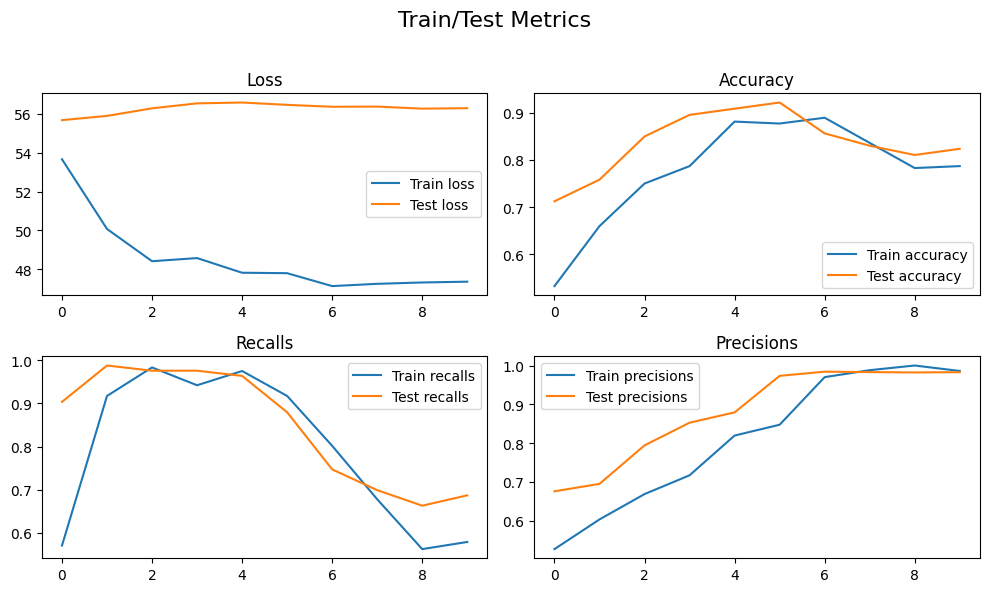

In [13]:
trainer.plot_metrics()